In [14]:
from qiskit import QuantumCircuit, Aer, transpile, IBMQ, execute, assemble
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import least_busy 
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, random_statevector
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, Aer, transpile, assemble
from qiskit.visualization import array_to_latex
from qiskit_experiments.library import LocalReadoutError, CorrelatedReadoutError

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info.analysis import hellinger_fidelity
from qiskit.visualization import plot_state_city, plot_gate_map

def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)

In [2]:
provider = IBMProvider(token="c4f42151ea981ccbec57377eb5a96dac822d734b7d169cc5f56b18acaf1595fcb0514c5870b8498565416fbfcebb8f48daa87805136bbdfcddd445ac962541f2")
backend = provider.get_backend("ibm_canberra")
#backend = provider.get_backend("ibmq_kolkata")

In [3]:
Alice = QuantumRegister(4, name="Alice")
Bob = QuantumRegister(4, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(4, name="C_A")
C_B = ClassicalRegister(4, name="C_B")

A1, A2, A3, A4 = Alice
B1, B2, B3, B4 = Bob

CUM = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM.u(alpha_b, beta_b, gamma_b, b)

CUM.h(A1)
CUM.cx(A1, B1)
CUM.cx(A1, A2)
CUM.cx(A1, A3)

CUM.h(B4)
CUM.cx(B4, A4)
CUM.cx(B4, B3)
CUM.cx(B4, B2)

CUM.barrier(range(10))

CUM.cx(a, A1)
CUM.cx(a, A2)
CUM.cx(a, A3)
CUM.h(a)

CUM.cx(b, B4)
CUM.cx(b, B3)
CUM.cx(b, B2)
CUM.h(b)

CUM.barrier(range(10))

CUM.measure(a, C_A[0])
CUM.measure(A1, C_A[1])
CUM.measure(A2, C_A[2])
CUM.measure(A3, C_A[3])

CUM.measure(b, C_B[0])
CUM.measure(B2, C_B[1])
CUM.measure(B3, C_B[2])
CUM.measure(B4, C_B[3])

CUM.barrier(range(10))

In [98]:
transpiled_circuit = transpile(CUM, backend, optimization_level=1)

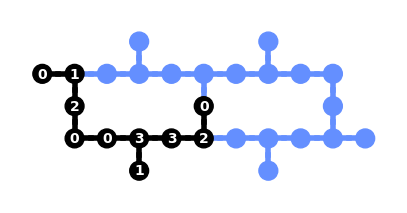

In [100]:
plot_circuit_layout(transpiled_circuit, backend)

In [103]:
job_run_on_backend_1 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_2 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_3 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_4 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_5 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_6 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_7 = backend.run(transpiled_circuit, shots = 4096*16*2)
job_run_on_backend_8 = backend.run(transpiled_circuit, shots = 4096*16*2)

In [7]:
noise_model = get_noise(0.01)

data_ErrorDataArray = np.zeros((256,256))
for state in ['00000000', '00000001', '00000010', '00000011', '00000100', '00000101', '00000110', '00000111', '00001000', '00001001', '00001010', '00001011', '00001100', '00001101', '00001110', '00001111',
             '00010000', '00010001', '00010010', '00010011', '00010100', '00010101', '00010110', '00010111', '00011000', '00011001', '00011010', '00011011', '00011100', '00011101', '00011110', '00011111',
             '00100000', '00100001', '00100010', '00100011', '00100100', '00100101', '00100110', '00100111', '00101000', '00101001', '00101010', '00101011', '00101100', '00101101', '00101110', '00101111',
             '00110000', '00110001', '00110010', '00110011', '00110100', '00110101', '00110110', '00110111', '00111000', '00111001', '00111010', '00111011', '00111100', '00111101', '00111110', '00111111',
             '01000000', '01000001', '01000010', '01000011', '01000100', '01000101', '01000110', '01000111', '01001000', '01001001', '01001010', '01001011', '01001100', '01001101', '01001110', '01001111',
             '01010000', '01010001', '01010010', '01010011', '01010100', '01010101', '01010110', '01010111', '01011000', '01011001', '01011010', '01011011', '01011100', '01011101', '01011110', '01011111',
             '01100000', '01100001', '01100010', '01100011', '01100100', '01100101', '01100110', '01100111', '01101000', '01101001', '01101010', '01101011', '01101100', '01101101', '01101110', '01101111',
             '01110000', '01110001', '01110010', '01110011', '01110100', '01110101', '01110110', '01110111', '01111000', '01111001', '01111010', '01111011', '01111100', '01111101', '01111110', '01111111',
             '10000000', '10000001', '10000010', '10000011', '10000100', '10000101', '10000110', '10000111', '10001000', '10001001', '10001010', '10001011', '10001100', '10001101', '10001110', '10001111',
             '10010000', '10010001', '10010010', '10010011', '10010100', '10010101', '10010110', '10010111', '10011000', '10011001', '10011010', '10011011', '10011100', '10011101', '10011110', '10011111',
             '10100000', '10100001', '10100010', '10100011', '10100100', '10100101', '10100110', '10100111', '10101000', '10101001', '10101010', '10101011', '10101100', '10101101', '10101110', '10101111',
             '10110000', '10110001', '10110010', '10110011', '10110100', '10110101', '10110110', '10110111', '10111000', '10111001', '10111010', '10111011', '10111100', '10111101', '10111110', '10111111',
             '11000000', '11000001', '11000010', '11000011', '11000100', '11000101', '11000110', '11000111', '11001000', '11001001', '11001010', '11001011', '11001100', '11001101', '11001110', '11001111',
             '11010000', '11010001', '11010010', '11010011', '11010100', '11010101', '11010110', '11010111', '11011000', '11011001', '11011010', '11011011', '11011100', '11011101', '11011110', '11011111',
             '11100000', '11100001', '11100010', '11100011', '11100100', '11100101', '11100110', '11100111', '11101000', '11101001', '11101010', '11101011', '11101100', '11101101', '11101110', '11101111',
             '11110000', '11110001', '11110010', '11110011', '11110100', '11110101', '11110110', '11110111', '11111000', '11111001', '11111010', '11111011', '11111100', '11111101', '11111110', '11111111']:
    R = QuantumRegister(8)
    C = ClassicalRegister(8)
    qc_8_measure = QuantumCircuit(R, C)
    
    if state[0]=='1':
        qc_8_measure.x(7)
    if state[1]=='1':
        qc_8_measure.x(6)  
    if state[2]=='1':
        qc_8_measure.x(5)
    if state[3]=='1':
        qc_8_measure.x(4)
    if state[4]=='1':
        qc_8_measure.x(3)
    if state[5]=='1':
        qc_8_measure.x(2)
    if state[6]=='1':
        qc_8_measure.x(1)
    if state[7]=='1':
        qc_8_measure.x(0)
    qc_8_measure.measure(R, C)
    
    if (state[4]=='1' and state[5]=='1' and state[6]=='1' and state[7]=='1'):
        print('processing ' + state)
    
    aersim = Aer.get_backend('aer_simulator')
    
    job_measure_at_backend = aersim.run(qc_8_measure, noise_model=noise_model, shots = int(np.power(2, 8*2)))
    
    counts_measure = job_measure_at_backend.result().get_counts()
    for i in counts_measure.keys():
        data_ErrorDataArray[4*(int(state[0])*32+int(state[1])*16+int(state[2])*8+int(state[3])*4+int(state[4])*2+int(state[5]))+int(state[6])*2+int(state[7])][4*(int(i[0])*32+int(i[1])*16+int(i[2])*8+int(i[3])*4+int(i[4])*2+int(i[5]))+int(i[6])*2+int(i[7])] += counts_measure.get(i)
    
data_ErrorMetricArray = data_ErrorDataArray/counts_measure.shots()

print(data_ErrorDataArray)

processing 00001111
processing 00011111
processing 00101111
processing 00111111
processing 01001111
processing 01011111
processing 01101111
processing 01111111
processing 10001111
processing 10011111
processing 10101111
processing 10111111
processing 11001111
processing 11011111
processing 11101111
processing 11111111
[[60456.   631.   633.     6.   590.     7.     3.     0.   624.     7.     5.     0.     7.     0.     0.     0.   630.    11.    11.     0.     4.     0.     0.     0.     8.     0.     0.     0.     0.     0.     0.     0.   585.     6.     9.     0.     2.     0.     0.     0.     4.     0.     1.     0.     0.     0.     0.     0.     5.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   601.     5.     5.     0.     7.     0.     0.     0.     7.     0.     0.     0.     0.     0.     0.     0.     6.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     4.

In [104]:
CUM_dataArray = np.zeros((16,16))

plot_histogram(job_run_on_backend_1.result().get_counts())
plot_histogram(job_run_on_backend_2.result().get_counts())
plot_histogram(job_run_on_backend_3.result().get_counts())
plot_histogram(job_run_on_backend_4.result().get_counts())
plot_histogram(job_run_on_backend_5.result().get_counts())
plot_histogram(job_run_on_backend_6.result().get_counts())
plot_histogram(job_run_on_backend_7.result().get_counts())
plot_histogram(job_run_on_backend_8.result().get_counts())

dict_keys_1 = job_run_on_backend_1.result().get_counts().keys()
dict_keys_2 = job_run_on_backend_2.result().get_counts().keys()
dict_keys_3 = job_run_on_backend_3.result().get_counts().keys()
dict_keys_4 = job_run_on_backend_4.result().get_counts().keys()
dict_keys_5 = job_run_on_backend_6.result().get_counts().keys()
dict_keys_6 = job_run_on_backend_6.result().get_counts().keys()
dict_keys_7 = job_run_on_backend_7.result().get_counts().keys()
dict_keys_8 = job_run_on_backend_8.result().get_counts().keys()

for i in dict_keys_1:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_1.result().get_counts().get(i)
for i in dict_keys_2:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_2.result().get_counts().get(i)
for i in dict_keys_3:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_3.result().get_counts().get(i)
for i in dict_keys_4:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_4.result().get_counts().get(i)
for i in dict_keys_5:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_5.result().get_counts().get(i)
for i in dict_keys_6:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_6.result().get_counts().get(i)
for i in dict_keys_7:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_7.result().get_counts().get(i)
for i in dict_keys_8:
    CUM_dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += job_run_on_backend_8.result().get_counts().get(i)

print(CUM_dataArray)

[[30499.  9290.  3279. 16168.  3510.  7983.  5326. 31804. 29143.  9003.  3389. 17306.  3518. 24458.  2931. 23095.]
 [ 2085.   699.   225.  1059.   248.   574.   373.  2243.  1978.   677.   212.  1194.   231.  1767.   215.  1662.]
 [ 2707.   851.   269.  1513.   315.   753.   480.  2995.  2788.   843.   316.  1613.   361.  2287.   265.  2164.]
 [ 2270.   779.   221.  1239.   277.   616.   403.  2383.  2166.   804.   236.  1303.   269.  1850.   233.  1659.]
 [ 3561.  1117.   401.  1885.   442.   970.   618.  3756.  3456.  1187.   422.  1973.   437.  2948.   316.  2722.]
 [11041.  3615.  1193.  5941.  1223.  2964.  2009. 11956. 10585.  3412.  1188.  6236.  1290.  9419.  1068.  8427.]
 [ 1820.   604.   189.  1020.   241.   488.   314.  1880.  1764.   557.   186.  1050.   218.  1537.   173.  1401.]
 [19650.  6340.  1972. 10564.  2231.  5337.  3575. 21428. 18935.  6243.  2027. 11291.  2416. 16758.  1823. 15246.]
 [28565.  8582.  3020. 15444.  3213.  7312.  4914. 29953. 27664.  8698.  2999. 1

In [105]:
CUM_data_vector = np.zeros((256, 1))
for i in range(16):
    for j in range(16):
        CUM_data_vector[i*16+j][0]=CUM_dataArray[i][j]
    
#print(CUM_data_vector)

In [106]:
import scipy.linalg as la

CUM_data_vector = np.dot(la.inv(data_ErrorMetricArray), CUM_data_vector)

#print(CUM_data_vector)

In [107]:
CUM_mitigation_data_array = np.zeros((16, 16))

for i in range(16):
    for j in range(16):
        CUM_mitigation_data_array[i][j] = CUM_data_vector[i*16+j][0]
    
np.set_printoptions(precision=0)    

print(CUM_dataArray)
print()

print(CUM_mitigation_data_array)
print()

print(CUM_mitigation_data_array-CUM_dataArray)
print()

[[30499.  9290.  3279. 16168.  3510.  7983.  5326. 31804. 29143.  9003.  3389. 17306.  3518. 24458.  2931. 23095.]
 [ 2085.   699.   225.  1059.   248.   574.   373.  2243.  1978.   677.   212.  1194.   231.  1767.   215.  1662.]
 [ 2707.   851.   269.  1513.   315.   753.   480.  2995.  2788.   843.   316.  1613.   361.  2287.   265.  2164.]
 [ 2270.   779.   221.  1239.   277.   616.   403.  2383.  2166.   804.   236.  1303.   269.  1850.   233.  1659.]
 [ 3561.  1117.   401.  1885.   442.   970.   618.  3756.  3456.  1187.   422.  1973.   437.  2948.   316.  2722.]
 [11041.  3615.  1193.  5941.  1223.  2964.  2009. 11956. 10585.  3412.  1188.  6236.  1290.  9419.  1068.  8427.]
 [ 1820.   604.   189.  1020.   241.   488.   314.  1880.  1764.   557.   186.  1050.   218.  1537.   173.  1401.]
 [19650.  6340.  1972. 10564.  2231.  5337.  3575. 21428. 18935.  6243.  2027. 11291.  2416. 16758.  1823. 15246.]
 [28565.  8582.  3020. 15444.  3213.  7312.  4914. 29953. 27664.  8698.  2999. 1

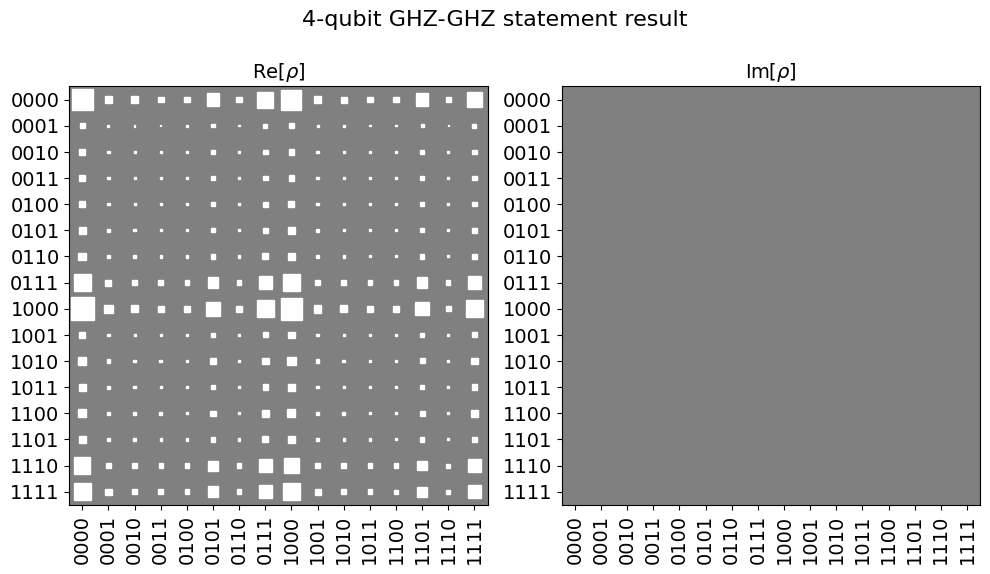

In [54]:
CUM_Densitymatrix = DensityMatrix(CUM_dataArray)
plot_state_hinton(CUM_Densitymatrix,
                  title="4-qubit GHZ-GHZ statement result",
                  figsize=(10,6))

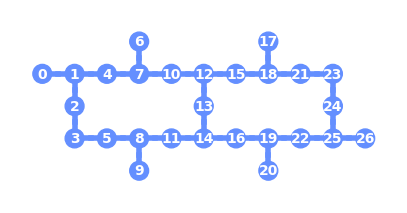

In [27]:
plot_gate_map(backend)

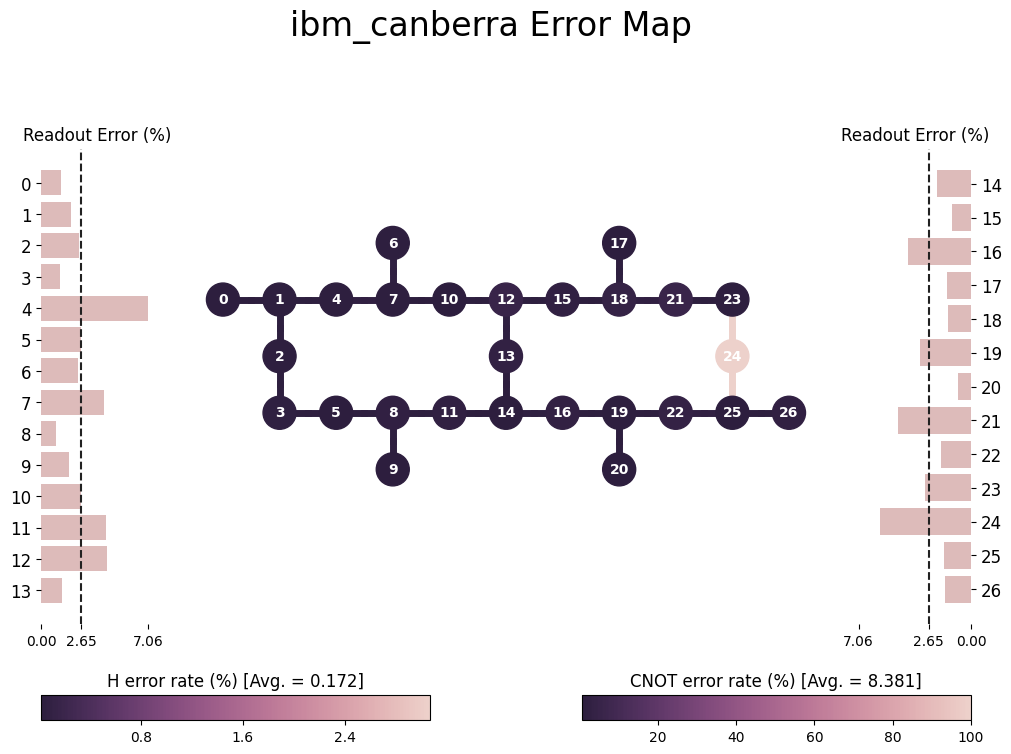

In [28]:
plot_error_map(backend)